In [1]:
import tensorflow as tf
import keras
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

c:\Users\mhatr\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_datagen=ImageDataGenerator(
    rescale=1/255
)

test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [3]:
train_dir='/DL/images/train/'
test_dir='/DL/images/test/'

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    class_mode="sparse",
    color_mode='grayscale',
    batch_size=100
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(28,28),
    class_mode="sparse",
    color_mode='grayscale',
    batch_size=100
)

Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [4]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [13]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                346176    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50


4/4 [==============================] - 1s 86ms/step - loss: 2.3070 - accuracy: 0.1000 - val_loss: 2.3467 - val_accuracy: 0.1200
Epoch 2/50
4/4 [==============================] - 0s 28ms/step - loss: 2.2685 - accuracy: 0.1700 - val_loss: 2.2929 - val_accuracy: 0.1000
Epoch 3/50
4/4 [==============================] - 0s 42ms/step - loss: 2.2062 - accuracy: 0.2100 - val_loss: 2.2441 - val_accuracy: 0.1800
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 2.1966 - accuracy: 0.2300 - val_loss: 2.2444 - val_accuracy: 0.1500
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 2.1455 - accuracy: 0.2600 - val_loss: 2.2276 - val_accuracy: 0.1500
Epoch 6/50
4/4 [==============================] - 0s 28ms/step - loss: 2.1049 - accuracy: 0.1900 - val_loss: 2.3218 - val_accuracy: 0.1200
Epoch 7/50
4/4 [==============================] - 0s 26ms/step - loss: 2.1142 - accuracy: 0.1800 - val_loss: 2.2791 - val_accuracy: 0.1300
Epoch 8/50
4/4 [======================

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 2.3672 - accuracy: 0.3200
Loss:  2.367219924926758
Accuracy:  0.3199999928474426


4/4 [==============================] - 0s 8ms/step
Actual Number:  0
Predicted Number:  8


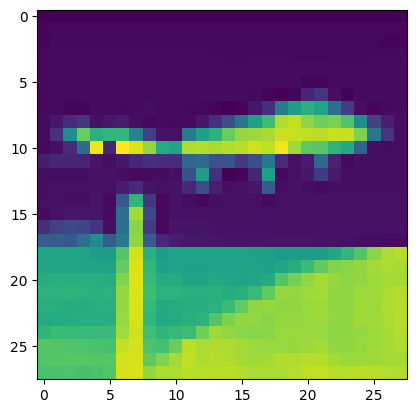

In [16]:
n = 30 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))